In [1]:
# Import necessary libraries
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import os


In [2]:
# Load pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()  # Set the model to evaluation mode

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
#locate folder path
folder_path = r'C:\Users\user\Documents\!TA\!TA\cornealtopography\Independent Test Set\Independent Test Set\Keratoconus\case1'

#empty list
images =[]

#loop read through the whole folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        img_path= os.path.join(folder_path, filename)
        img = Image.open(img_path).convert('RGB')
        images.append(img) 

images

[<PIL.Image.Image image mode=RGB size=224x224 at 0x1DBA2CA3130>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x1DB800E3DC0>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x1DBA2CA3190>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x1DBA2CA31F0>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x1DBA2CA3220>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x1DBA2CA3250>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x1DBA2CA3280>]

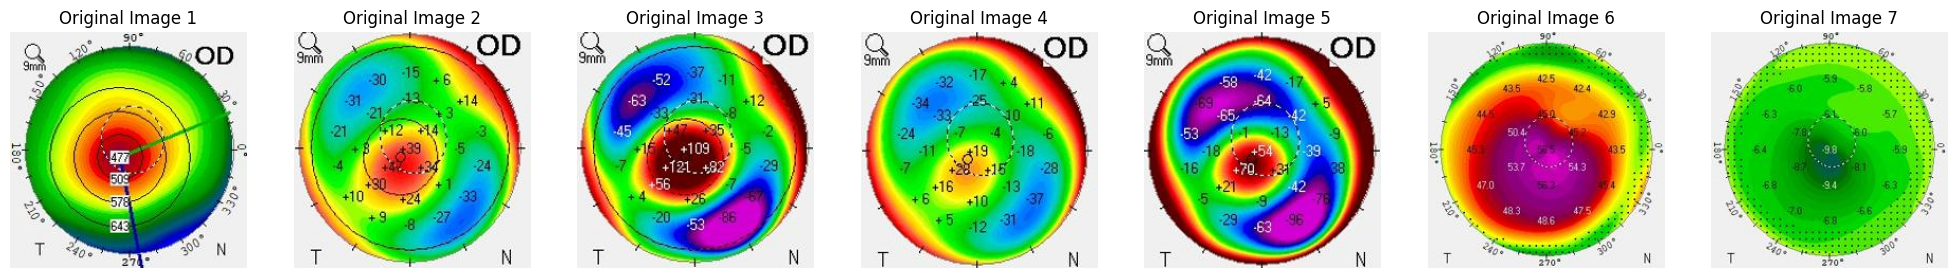

In [4]:
#visualize original images
fig, axs = plt.subplots(1, len(images), figsize=(25, 15))
for i, image in enumerate(images):
    axs[i].imshow(image)
    axs[i].set_title(f'Original Image {i+1}')
    axs[i].axis('off')
plt.show()

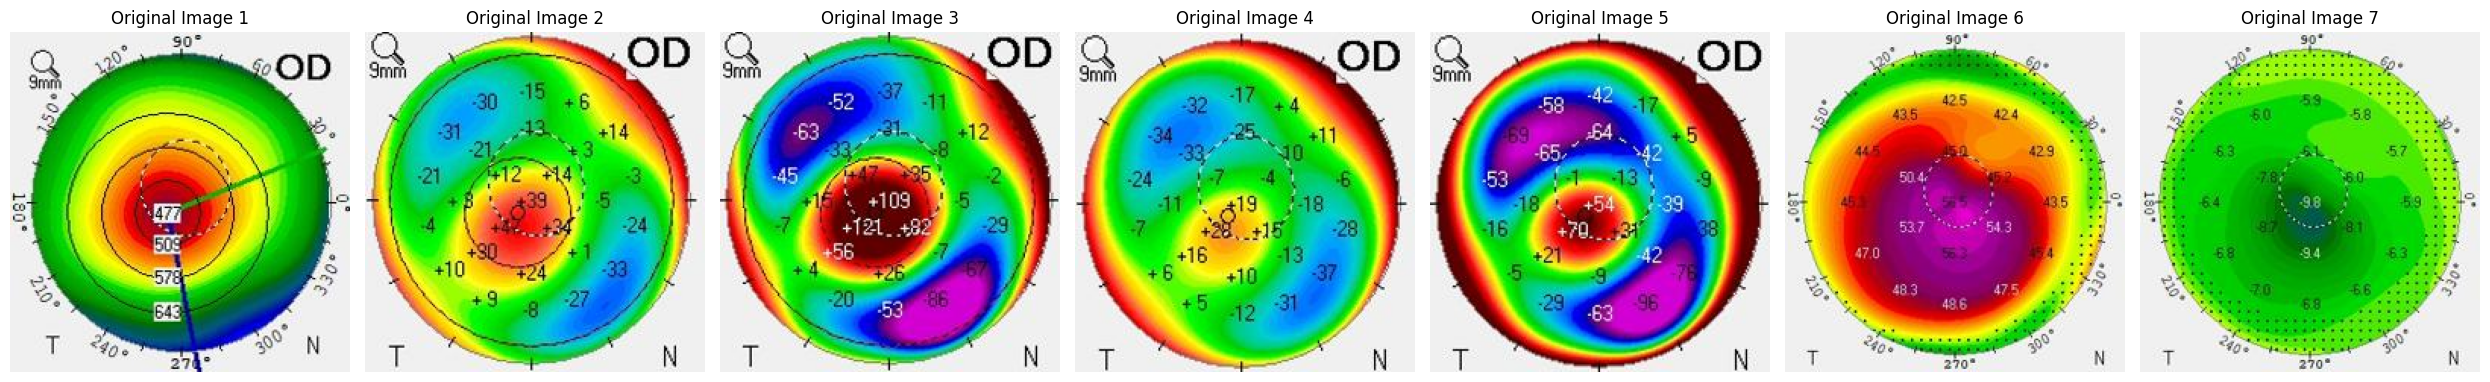

In [5]:
#function visualize original
def visualize_OI (images, figsize=(25, 15)):
    fig, axs = plt.subplots(1, len(images), figsize=figsize)
    for i, image in enumerate(images):
        axs[i].imshow(image)
        axs[i].set_title(f'Original Image {i+1}')
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

visualize_OI(images)

In [6]:
# Define preprocessing transformation
preprocess_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
    transforms.ToTensor(),          # Convert the image to a tensor
    transforms.Normalize(
        # Normalization mean for ImageNet that already computed
        mean=[0.485, 0.456, 0.406],  #mean  represents avg color intensity
        # Normalization std for ImageNet that already computed
        std=[0.229, 0.224, 0.225]    #std represent how much color itensity from mean
    )
])

In [7]:
preprocess_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


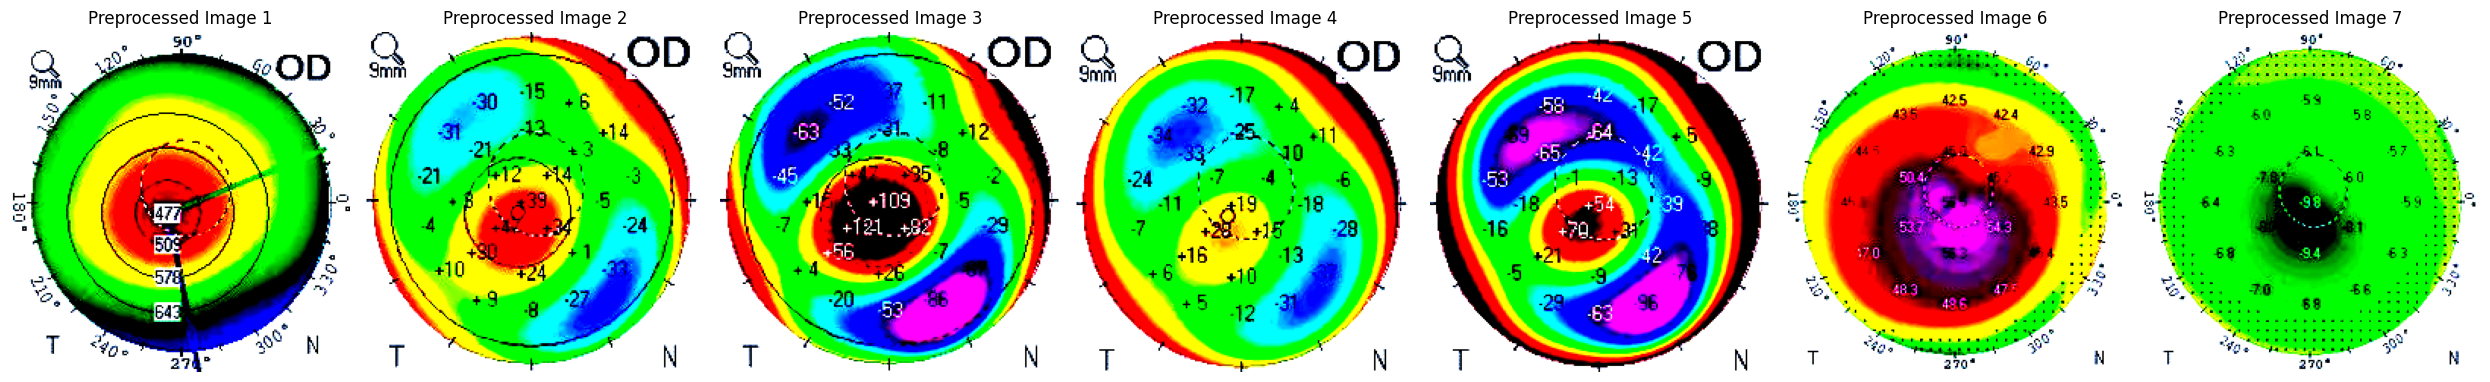

In [8]:
#visualize preporcessed images
fig, axs = plt.subplots(1, len(images), figsize=(25, 15))
for i, image in enumerate(images):
    preprocessed_image = preprocess_transform(image)
    preprocessed_image_np = preprocessed_image.permute(1, 2, 0).numpy()

    axs[i].imshow(preprocessed_image_np)
    axs[i].set_title(f'Preprocessed Image {i+1}')
    axs[i].axis('off')
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


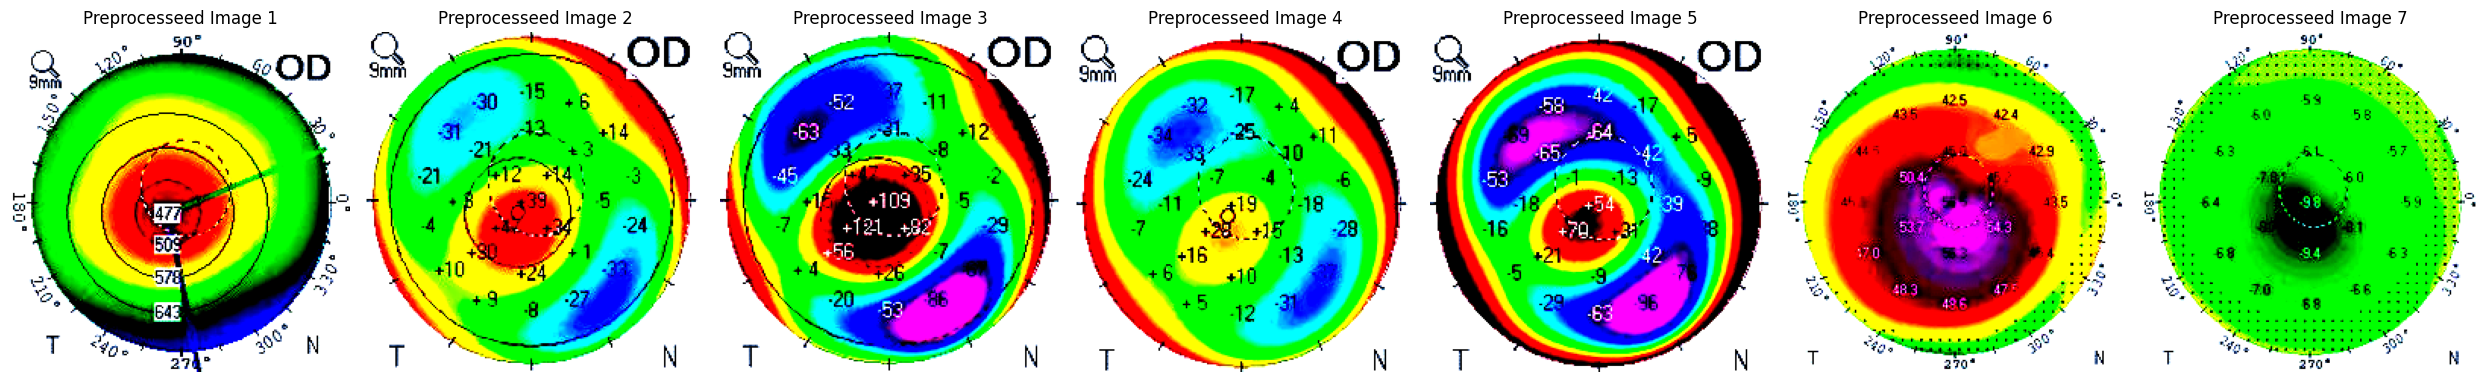

In [9]:
#function visualize preporcessed
def visualize_PI(images, preprocess_transform, figsize=(25, 15)):
    fig, axs = plt.subplots(1, len(images), figsize=figsize)
    for i, image in enumerate(images):
        preprocessed_image = preprocess_transform(image)
        preprocessed_image_np = preprocessed_image.permute(1, 2, 0).numpy()

        axs[i].imshow(preprocessed_image_np)
        axs[i].set_title(f'Preprocesseed Image {i+1}')
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_PI(images, preprocess_transform)

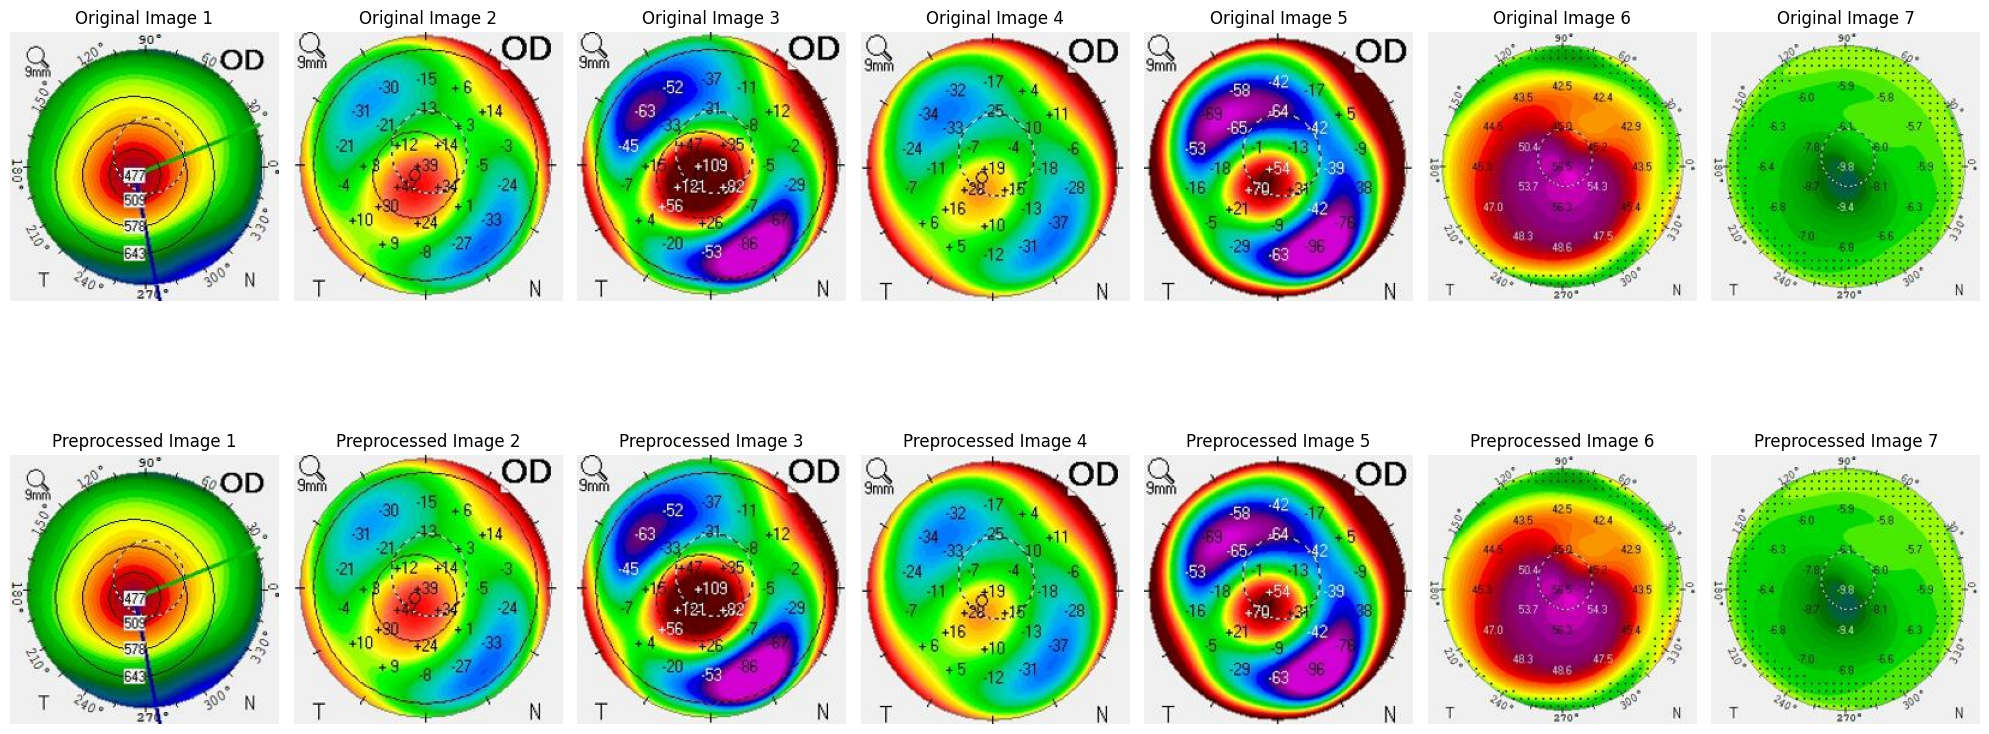

In [10]:
#visualize images
fig, axs = plt.subplots(2, len(images), figsize=(20, 10))
for i, image in enumerate(images):
    #images = os.path.join(folder_path, filename)
    preprocessed_image = preprocess_transform(image)
    
    preprocessed_image = preprocessed_image.clone()
    for t, m, s in zip(preprocessed_image, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]):
        t.mul_(s).add_(m)

    preprocessed_image_np = preprocessed_image.permute(1, 2, 0).numpy()
    axs[0, i].imshow(image)
    axs[0, i].set_title(f'Original Image {i+1}')
    axs[0, i].axis('off')

    axs[1, i].imshow(preprocessed_image_np)
    axs[1, i].set_title(f'Preprocessed Image {i+1}')
    axs[1, i].axis('off')
plt.tight_layout()
plt.show()

In [11]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [12]:
# Apply the preprocessing transformation
preprocessed_image = preprocess_transform(img)
preprocessed_image



tensor([[[1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920],
         [1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920],
         [1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920],
         ...,
         [1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920],
         [1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920],
         [1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920]],

        [[2.1660, 2.1660, 2.1660,  ..., 2.1660, 2.1660, 2.1660],
         [2.1660, 2.1660, 2.1660,  ..., 2.1660, 2.1660, 2.1660],
         [2.1660, 2.1660, 2.1660,  ..., 2.1660, 2.1660, 2.1660],
         ...,
         [2.1660, 2.1660, 2.1660,  ..., 2.1660, 2.1660, 2.1660],
         [2.1660, 2.1660, 2.1660,  ..., 2.1660, 2.1660, 2.1660],
         [2.1660, 2.1660, 2.1660,  ..., 2.1660, 2.1660, 2.1660]],

        [[2.3786, 2.3786, 2.3786,  ..., 2.3786, 2.3786, 2.3786],
         [2.3786, 2.3786, 2.3786,  ..., 2.3786, 2.3786, 2.3786],
         [2.3786, 2.3786, 2.3786,  ..., 2.3786, 2.3786, 2.

In [13]:
# Add a batch dimension for the model input
input_tensor = preprocessed_image.unsqueeze(0)  # Shape becomes (1, 3, 224, 224)

input_tensor

tensor([[[[1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920],
          [1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920],
          [1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920],
          ...,
          [1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920],
          [1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920],
          [1.9920, 1.9920, 1.9920,  ..., 1.9920, 1.9920, 1.9920]],

         [[2.1660, 2.1660, 2.1660,  ..., 2.1660, 2.1660, 2.1660],
          [2.1660, 2.1660, 2.1660,  ..., 2.1660, 2.1660, 2.1660],
          [2.1660, 2.1660, 2.1660,  ..., 2.1660, 2.1660, 2.1660],
          ...,
          [2.1660, 2.1660, 2.1660,  ..., 2.1660, 2.1660, 2.1660],
          [2.1660, 2.1660, 2.1660,  ..., 2.1660, 2.1660, 2.1660],
          [2.1660, 2.1660, 2.1660,  ..., 2.1660, 2.1660, 2.1660]],

         [[2.3786, 2.3786, 2.3786,  ..., 2.3786, 2.3786, 2.3786],
          [2.3786, 2.3786, 2.3786,  ..., 2.3786, 2.3786, 2.3786],
          [2.3786, 2.3786, 2.3786,  ..., 2

In [14]:
# # Plot the original and preprocessed image
# plt.figure(figsize=(12, 6))

# # Original image
# plt.subplot(1, 2, 1)
# plt.imshow(images[0])
# plt.title('Original Image')
# plt.axis('off')

In [15]:
# Preprocessed image (inverse transform for visualization)
preprocessed_image_visual = preprocessed_image.permute(1, 2, 0)  # Change to (H, W, C)
preprocessed_image_visual = preprocessed_image_visual * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Denormalize
preprocessed_image_visual = preprocessed_image_visual.clamp(0, 1)  # Clip values to [0, 1]

In [16]:
preprocessed_image_visual

tensor([[[0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         ...,
         [0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412]],

        [[0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         ...,
         [0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412]],

        [[0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         ...,
         [0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412]],

        ...,

        [[0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         ...,
         [0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412]],

        [[0.9412, 0.9412, 0.9412],
         [0.9412, 0.9412, 0.9412],
         [0.

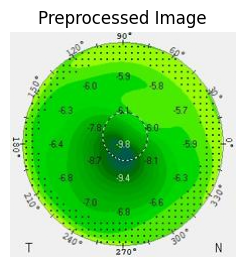

In [17]:
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image_visual)
plt.title('Preprocessed Image')
plt.axis('off')

plt.show()

In [18]:
# Perform inference
with torch.no_grad():
    output = vgg16(input_tensor)  # Get model predictions
    probabilities = torch.nn.functional.softmax(output[0], dim=0)  # Apply softmax to get probabilities



In [19]:
# Get the top 5 predictions
top5_prob, top5_catid = torch.topk(probabilities, 5)

In [20]:
top5_catid

tensor([409, 635, 426, 892, 712])

In [21]:
top5_prob

tensor([0.6466, 0.0886, 0.0773, 0.0703, 0.0501])

In [22]:
from torchvision.models import vgg16, VGG16_Weights

org_vgg = vgg16(weights=VGG16_Weights.IMAGENET1K_V1) 